<a href="https://colab.research.google.com/github/Shweta-singh-davv/python-data-science/blob/main/bank_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
bank_customer= pd.read_csv("/content/Bank Customer Churn Prediction.csv")

In [4]:
bank_customer.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
bank_customer.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
bank_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
bank_customer['country']=bank_customer['country'].astype("category")
bank_customer['gender']= bank_customer['gender'].astype("category")
bank_customer['products_number']=bank_customer['products_number'].astype("category")
bank_customer['credit_card']= bank_customer['credit_card'].astype("category")
bank_customer['active_member']=bank_customer['active_member'].astype("category")
bank_customer['churn']= bank_customer['churn'].astype("category")

In [7]:
bank_customer['country'].unique()

['France', 'Spain', 'Germany']
Categories (3, object): ['France', 'Germany', 'Spain']

In [8]:
bank_customer['active_member'].unique()

[1, 0]
Categories (2, int64): [0, 1]

In [9]:
bank_customer['active_member'].unique()

[1, 0]
Categories (2, int64): [0, 1]

In [10]:
bank_customer['churn'].unique()

[1, 0]
Categories (2, int64): [0, 1]

In [11]:
bank_customer['credit_card'].unique()

[1, 0]
Categories (2, int64): [0, 1]

In [12]:
bank_customer['gender'].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [13]:
bank_customer.describe()

,customer_id,credit_score,age,tenure,balance,estimated_salary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,199992.480000


<Axes: xlabel='credit_score'>

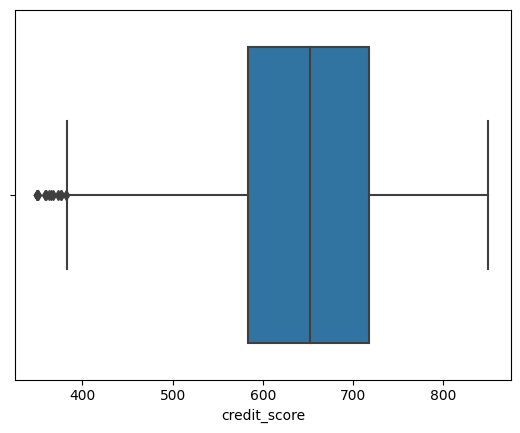

In [28]:
# visualising anomalies using boxplot for credit_score, age, tenure, balance and estimated_salary
sns.boxplot(x='credit_score',data=bank_customer)
# 75% customers have credit score above 584 upto 850
# there is some anomaly in credit score as some customers have credit score below 358
# average credit score is 650 but can be seen that top 25% of customres have credit score of 718 and above

In [18]:
# lets analyse customers based on credit score
# customres with credit score in anomaly
credit_score_anamoly=bank_customer[bank_customer.credit_score<400]
credit_score_anamoly.sort_values(by=['credit_score'])


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9624,15668309,350,France,Female,40,0,111098.85,1,1,1,172321.21,1
8762,15765173,350,France,Female,60,3,0.00,1,0,0,113796.15,1
8723,15803202,350,France,Male,51,10,0.00,1,1,1,125823.79,1
1631,15685372,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,15758813,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
2473,15679249,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
1962,15692416,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
1405,15612494,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1193,15779947,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
2579,15597896,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1


In [20]:
# from the above data frame, credit_score below 358 are anamolies
credit_score_anamoly[credit_score_anamoly.credit_score<358]
# all of them churned from thebank services and most of them were above the age of 50 years with product_number =1
#interestingly most of them have a decent salary and balance


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1631,15685372,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,15758813,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
2473,15679249,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
8723,15803202,350,France,Male,51,10,0.00,1,1,1,125823.79,1
8762,15765173,350,France,Female,60,3,0.00,1,0,0,113796.15,1
9624,15668309,350,France,Female,40,0,111098.85,1,1,1,172321.21,1


<Axes: xlabel='age'>

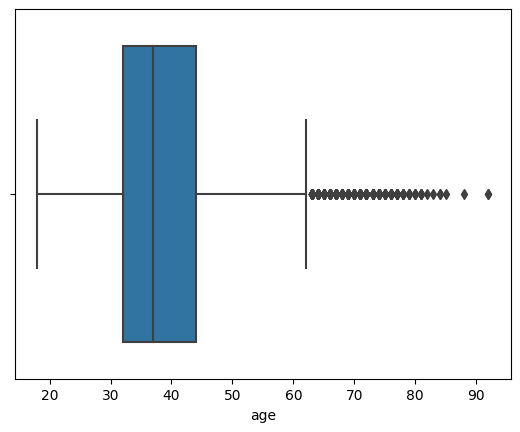

In [22]:
# boxplot of age
sns.boxplot(x='age',data=bank_customer)
# from description above 75% of customers are below 44 years of age
# most of the customers  are of age 18 to 62
# anamoly is above age of 62

In [25]:
customer_age_anamoly=bank_customer[bank_customer.age>62].sort_values(by=['age'])
customer_age_anamoly
# out of 10,000 customers, 359 customers are above 62

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
769,15685329,531,France,Female,63,1,114715.71,1,0,1,24506.95,1
8562,15647292,697,France,Male,63,7,148368.02,1,0,0,118862.08,1
2053,15610686,850,France,Male,63,8,169832.57,1,0,0,184107.26,1
2078,15815626,640,France,Male,63,2,68432.45,2,1,1,112503.24,1
6410,15762351,689,Spain,Female,63,1,0.00,2,1,1,186526.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3531,15653251,408,France,Female,84,8,87873.39,1,0,0,188484.52,1
3033,15578006,787,France,Female,85,10,0.00,2,1,1,116537.96,0
2458,15813303,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
6443,15764927,753,France,Male,92,3,121513.31,1,0,1,195563.99,0


<Axes: xlabel='age'>

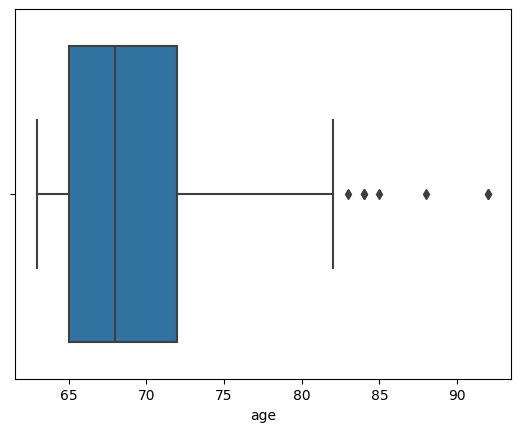

In [26]:
sns.boxplot(x='age',data=customer_age_anamoly)
# in this age group as well, approx 75% of customers are below 72 age


In [27]:
customer_age_anamoly.describe()
# at first glance, it seems credit_score, tenure ,balance, and estimated salary
# seems pretty good for customers above 62 years of age

,customer_id,credit_score,age,tenure,balance,estimated_salary
count,3.590000e+02,359.000000,359.000000,359.000000,359.000000,359.000000
mean,1.569174e+07,657.005571,69.270195,4.944290,74477.573649,97883.247354
std,7.439883e+04,95.515713,5.237059,2.982671,62335.296038,57499.034723
min,1.556669e+07,408.000000,63.000000,0.000000,0.000000,502.700000
25%,1.562937e+07,596.000000,65.000000,2.000000,0.000000,49530.100000
50%,1.568477e+07,657.000000,68.000000,5.000000,95039.120000,97893.400000
75%,1.575990e+07,720.000000,72.000000,8.000000,126389.985000,145873.755000
max,1.581563e+07,850.000000,92.000000,10.000000,187013.130000,199493.380000
